In [27]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(40,20)
plt.style.use('ggplot')

In [2]:
market_df = pd.read_csv('SP500.csv', index_col='DATE', parse_dates=True)

In [26]:
market_df.tail()

,SP500
DATE,
2009-08-01,909.73
2009-07-01,906.65
2009-06-01,934.70
2009-05-01,927.45
2009-02-01,931.80


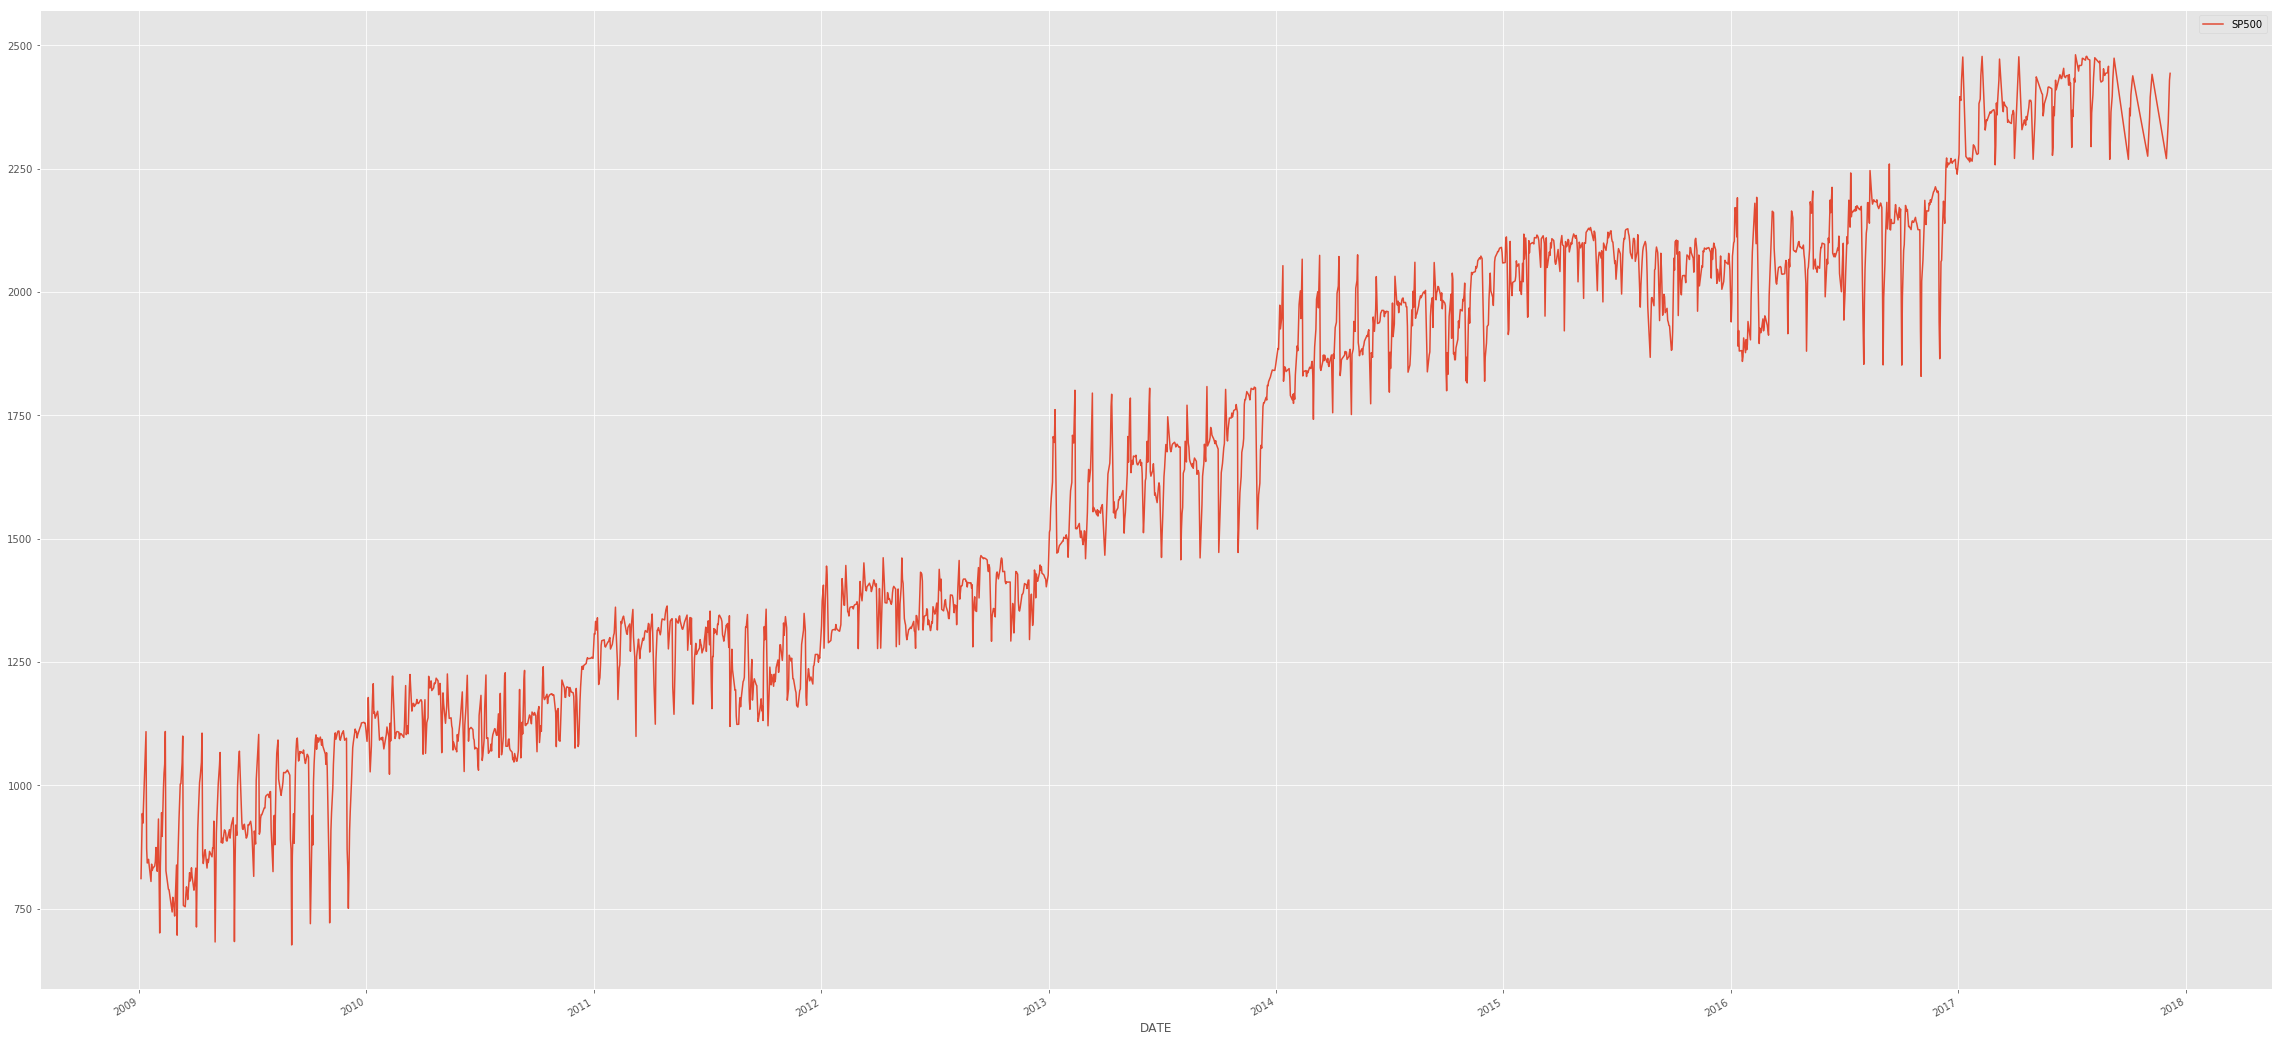

In [28]:
market_df.plot()

In [4]:
df = market_df.reset_index().rename(columns={'DATE':'ds', 'SP500':'y'})
df['y'] = np.log(df['y'])

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


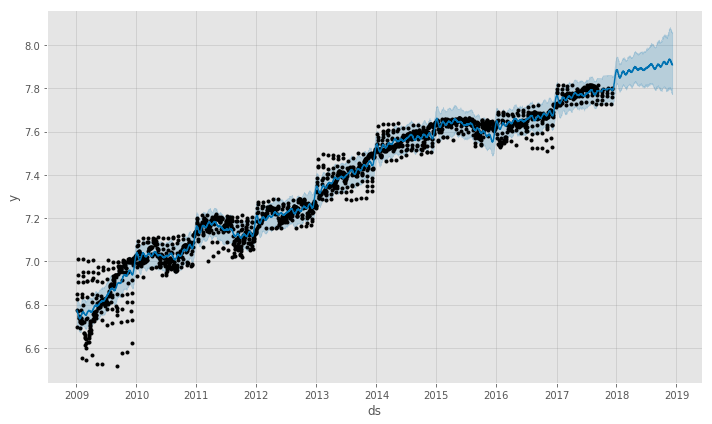

In [33]:
model = Prophet(weekly_seasonality=True)
model.fit(df);
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.
forecast = model.predict(future)
figure=model.plot(forecast)

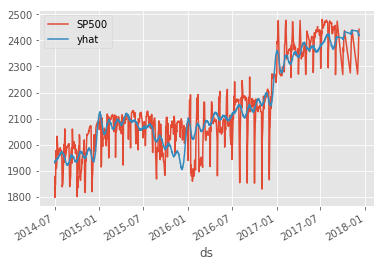

In [8]:
two_years = forecast.set_index('ds').join(market_df)
two_years = two_years[['SP500', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['SP500', 'yhat']].plot()

In [29]:
two_years.tail()

,SP500,yhat,yhat_upper,yhat_lower
ds,,,,
2017-12-01,2270.44,2436.268065,2594.551551,2290.516326
2017-12-04,2344.93,2426.313488,2566.686338,2289.351521
2017-12-05,2390.90,2418.021243,2579.563783,2274.935496
2017-12-06,2429.39,2422.863787,2584.407138,2276.317317
2017-12-07,2443.25,2421.033404,2578.148136,2273.515574


In [10]:
r2_score(two_years.SP500, two_years.yhat)

0.79967091182592365

In [11]:
mean_squared_error(two_years.SP500, two_years.yhat)

5116.3052276704648

In [12]:
mean_absolute_error(two_years.SP500, two_years.yhat)

54.158545078215113

Text(0.5, 0, 'Date')

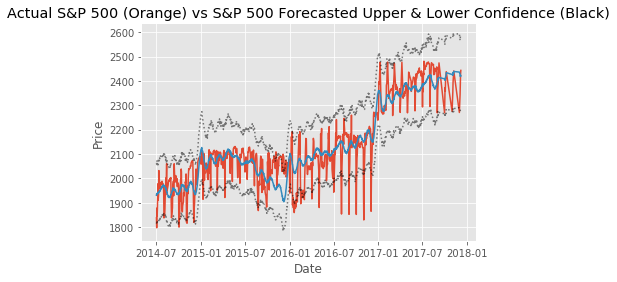

In [13]:
fig, ax1 = plt.subplots()
ax1.plot(two_years.SP500)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [14]:
full_df = forecast.set_index('ds').join(market_df)
full_df['yhat']=np.exp(full_df['yhat'])

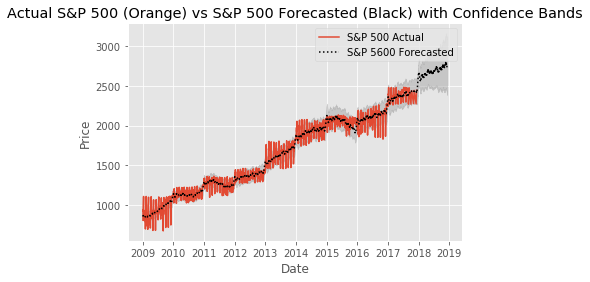

In [15]:
fig, ax1 = plt.subplots()
ax1.plot(full_df.SP500)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted (Black) with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('S&P 500 Actual') #change the legend text for 1st plot
L.get_texts()[1].set_text('S&P 5600 Forecasted') #change the legend text for 2nd plot